In [69]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import sys, os

sys.path.append('/global/homes/q/qmxp55/DESI/BGS_paper/')
from desitarget.cuts import select_targets
from desitarget import io
from desitarget.sv1.sv1_targetmask import desi_mask, bgs_mask, mws_mask

In [77]:
nside = io.desitarget_nside()
sweep_dir_dr8south = '/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0'
sweep_dir_dr8north = '/global/project/projectdirs/cosmo/data/legacysurvey/dr8/north/sweep/8.0'
dest = '/global/cscratch1/sd/qmxp55/desitarget_output/targets-BGS-sv1-dr8_lowq_relaxed.fits'

infilessouth = io.list_sweepfiles(sweep_dir_dr8south)
infilesnorth = io.list_sweepfiles(sweep_dir_dr8north)

In [78]:
infiles = np.concatenate((infilessouth, infilesnorth)).tolist()

In [79]:
#
import time
start = time.time()

targets = select_targets(infiles[:4], mask=True, tcnames=["BGS"], survey='sv1')
bits = ['BGS_FAINT', 'BGS_BRIGHT', 'BGS_FAINT_EXT', 'BGS_LOWQ', 'BGS_FIBMAG', ]

end = time.time()
print('Total run time: %f sec' %(end - start))

for bit in bits:
    bgsbit = ((targets['SV1_BGS_TARGET'] & bgs_mask[bit]) != 0)
    print(bit, np.sum(bgsbit))
    

INFO:cuts.py:2213:select_targets: Running on the sv1 survey


/global/homes/q/qmxp55/DESI/BGS_paper/desitarget/sv1/sv1_cuts.py:956: RuntimeWarning: invalid value encountered in less
  bgs_qcs &= (gfracflux < 5.0) & (rfracflux < 5.0) & (zfracflux < 5.0)


Total run time: 40.012773 sec
BGS_FAINT 96675
BGS_BRIGHT 109801
BGS_FAINT_EXT 80677
BGS_LOWQ 30518
BGS_FIBMAG 33010


In [39]:
# ADM write the targets to file.
io.write_targets(dest, targets, survey="sv1")

(350681,
 '/global/cscratch1/sd/qmxp55/desitarget_output/targets-BGS-sv1-dr8.0-1_lowq_relaxed.fits')

rmag min: -10.990551, rmag max: 20.999998


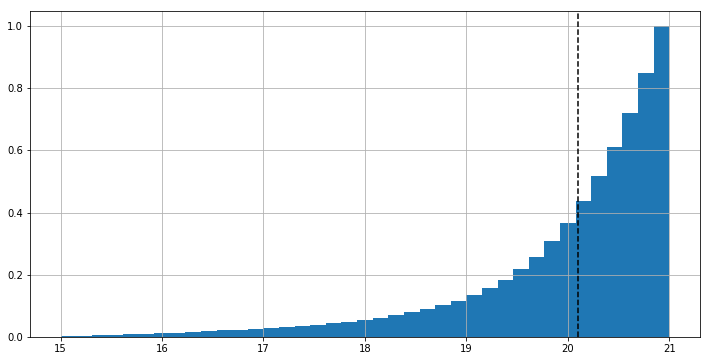

In [75]:
lowq = ((targets['SV1_BGS_TARGET'] & bgs_mask['BGS_LOWQ']) != 0)

def flux_to_mag(flux):
    mag = 22.5 - 2.5*np.log10(flux)
    return mag

rmag = flux_to_mag(targets['FLUX_R']/targets['MW_TRANSMISSION_R'])

print('rmag min: %f, rmag max: %f' %(rmag[lowq].min(),rmag[lowq].max()))

bins = np.linspace(15, 21, 40)
plt.figure(figsize=(12, 6))
plt.axvline(20.1, ls='--', c='k')
plt.hist(rmag[lowq], bins=bins, density=True, cumulative=True)
plt.grid()
plt.show()